# Task 3 - Handwritten Digit Recognition Using MNIST Dataset.

## Import All Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import warnings 
warnings.filterwarnings("ignore")

## Load mnist data from keras

In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

## How many rows and columns present?

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
print(y_train.shape)

(60000,)


In [5]:
print(X_test.shape)

(10000, 28, 28)


In [6]:
print(y_test.shape)

(10000,)


## Draw sample from data

In [7]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Show the Image

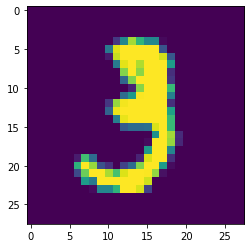

In [8]:
plt.imshow(X_train[10])

In [9]:
y_train[10]

3

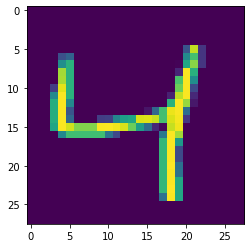

In [10]:
plt.imshow(X_train[2])

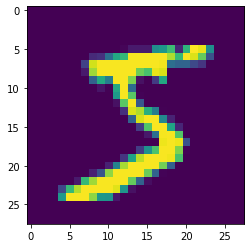

In [11]:
plt.imshow(X_train[0])

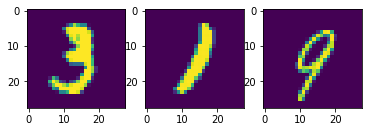

In [12]:
plt.subplot(231)
plt.imshow(X_train[10])
plt.subplot(232)
plt.imshow(X_train[78])
plt.subplot(233)
plt.imshow(X_train[22])
plt.show()

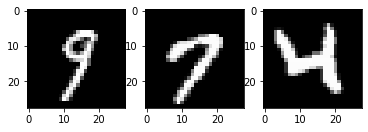

In [13]:
plt.subplot(234)
plt.imshow(X_train[43], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[20], cmap=plt.get_cmap('gray'))
plt.show()

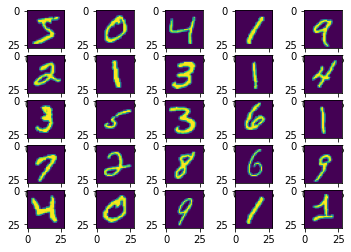

<Figure size 1152x648 with 0 Axes>

In [14]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
plt.figure(figsize = (16, 9))    
plt.show()

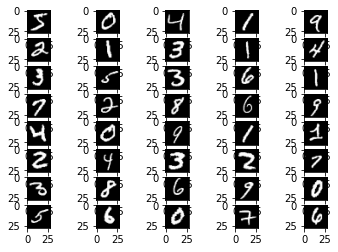

<Figure size 1152x648 with 0 Axes>

In [15]:
for i in range(40):
    plt.subplot(8,5,i+1)
    plt.imshow(X_train[i], cmap = 'gray')
plt.figure(figsize = (16, 9))    
plt.show()

## Normalize X_train,X_test images

In [16]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
print(X_train[0].shape)

(28, 28)


## Reshaping the data to fit the model

In [17]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

## One-Hot Encoding

In [20]:
from keras.utils import to_categorical

In [21]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [22]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
y_test_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Build the CNN model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

## Create Architecture

In [26]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                                 
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
____________________________________________________

## Compile The Model

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [29]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1703 - accuracy: 0.9503 - val_loss: 0.0712 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 113s 61ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0441 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0456 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0463 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0403 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.

## Plot the Accuraccy and Loss

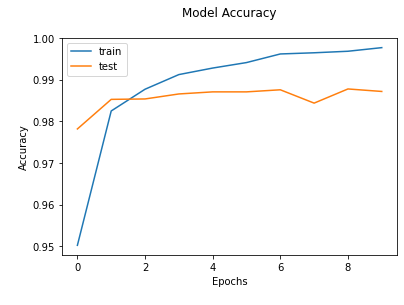

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy\n')
plt.xlabel('Epochs\n')
plt.ylabel('\nAccuracy')
plt.legend(['train', 'test'], loc = 'best')
plt.show()